# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading Data

In [2]:

df=pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
df.size


56952

In [4]:
df.shape

(4746, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
print(df['Rent'].value_counts())

15000    275
10000    248
12000    238
20000    175
8000     162
        ... 
4600       1
79500      1
76000      1
45002      1
5800       1
Name: Rent, Length: 243, dtype: int64


Mean , Median , Maximum and Minimum values for Rent

In [8]:
print("Mean House Rent:", round(df["Rent"].mean()))
print("Median House Rent:", round(df["Rent"].median()))
print("Highest House Rent:", round(df["Rent"].max()))
print("Lowest House Rent:", round(df["Rent"].min()))

Mean House Rent: 34993
Median House Rent: 16000
Highest House Rent: 3500000
Lowest House Rent: 1200


In [9]:
df["Rent"].sort_values(ascending = False)[:5]

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
Name: Rent, dtype: int64

In [10]:
df["Rent"].sort_values()[:5]

4076    1200
285     1500
471     1800
2475    2000
146     2200
Name: Rent, dtype: int64

# Visualizing Raw Data

Houses available in Different City

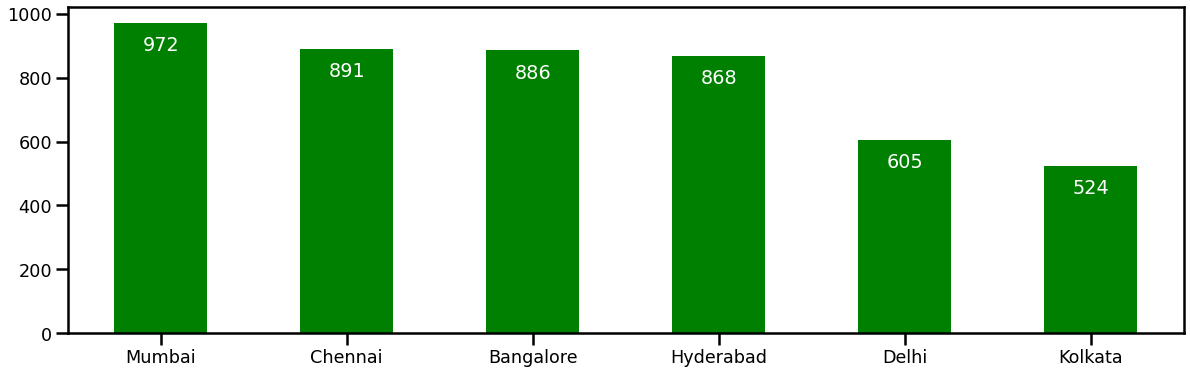

In [11]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = df["City"].value_counts().plot(kind = 'bar', color = "green", rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100), ha = 'center', va = 'bottom', color = 'white')


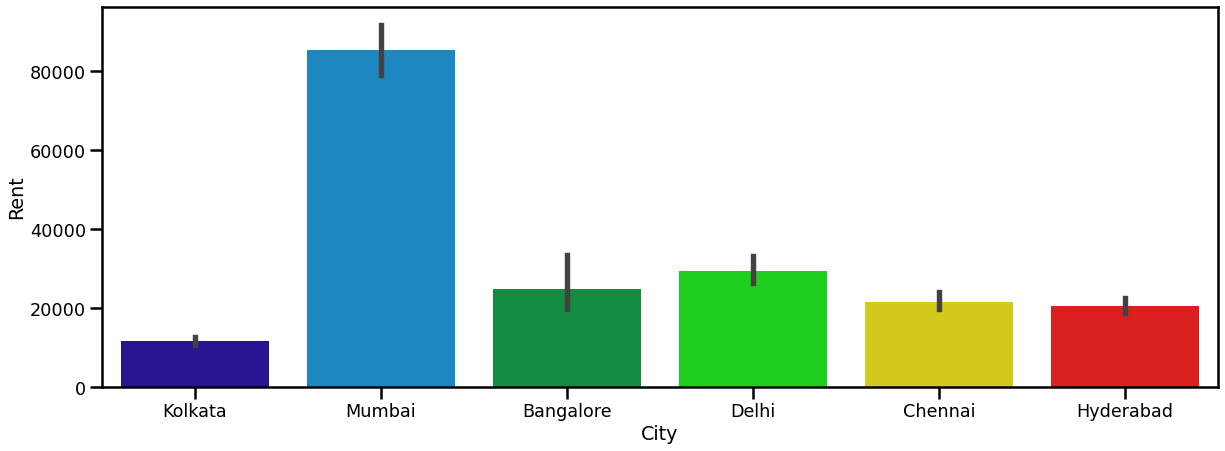

In [12]:
plt.figure(figsize = (20, 7))
sns.barplot(x = df["City"], y = df["Rent"], palette = "nipy_spectral");

# Data Cleaning

In [13]:
df.isnull().sum().sort_values(ascending=False)

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
print(pd.get_dummies(df['Area Type']).head(5))

   Built Area  Carpet Area  Super Area
0           0            0           1
1           0            0           1
2           0            0           1
3           0            0           1
4           0            1           0


In [16]:
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Posted On' has 81 unique categories
Feature 'Floor' has 480 unique categories
Feature 'Area Type' has 3 unique categories
Feature 'Area Locality' has 2235 unique categories
Feature 'City' has 6 unique categories
Feature 'Furnishing Status' has 3 unique categories
Feature 'Tenant Preferred' has 3 unique categories
Feature 'Point of Contact' has 3 unique categories


In [17]:
# Checking how well observations are distributed for each features

In [18]:
print(df['Posted On'].value_counts().sort_values(ascending=False).head(10))

2022-07-06    311
2022-05-12    149
2022-06-04    135
2022-07-09    126
2022-05-23    125
2022-05-27    125
2022-04-29    114
2022-07-07    112
2022-06-20    111
2022-07-04    110
Name: Posted On, dtype: int64


In [19]:
print(df['Floor'].value_counts().sort_values(ascending=False).head(25))

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
3 out of 4         239
Ground out of 3    209
1 out of 4         200
Ground out of 1    195
1 out of 1         134
2 out of 2         132
Ground out of 4    115
2 out of 5         106
3 out of 3          96
1 out of 5          87
4 out of 5          86
3 out of 5          84
4 out of 4          73
5 out of 7          32
3 out of 7          32
Ground out of 5     29
5 out of 5          28
4 out of 7          27
6 out of 7          24
2 out of 7          23
Name: Floor, dtype: int64


In [20]:
print(df['Area Type'].value_counts().sort_values(ascending=False).head(10))

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64


In [21]:
print(df['Area Locality'].value_counts().sort_values(ascending=False).head(10))

Bandra West        37
Gachibowli         29
Electronic City    24
Velachery          22
Miyapur, NH 9      22
Madipakkam         20
Chembur            19
Laxmi Nagar        19
K R Puram          19
Kondapur           18
Name: Area Locality, dtype: int64


In [22]:
print(df['City'].value_counts().sort_values(ascending=False).head(10))

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64


In [23]:
print(df['Furnishing Status'].value_counts().sort_values(ascending=False).head(10))

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64


In [24]:
print(df['Tenant Preferred'].value_counts().sort_values(ascending=False).head(10))

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64


In [25]:
print(df['Point of Contact'].value_counts().sort_values(ascending=False).head(10))

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64


In [26]:
df["Total Floors"] = df["Floor"].apply(lambda floor:floor.split()[-1])
df["Floor"] = df["Floor"].apply(lambda floor:floor.split()[0])
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors
0,2022-05-18,2,10000,1100,Ground,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


# Dealing with Categorical Data

In [27]:
df = pd.get_dummies(df, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Locality,Bathroom,Total Floors,Area Type_Built Area,Area Type_Carpet Area,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2022-05-18,2,10000,1100,Ground,Bandel,2,2,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2022-05-13,2,20000,800,1,"Phool Bagan, Kankurgachi",1,3,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2022-05-16,2,17000,1000,1,Salt Lake City Sector 2,1,3,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2022-07-04,2,10000,800,1,Dumdum Park,1,2,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2022-05-09,2,7500,850,1,South Dum Dum,1,2,0,1,...,0,0,0,1,1,0,0,0,0,1


Dropping irrelevant features:



In [28]:
df.drop(columns='Posted On', inplace=True)
df.drop(columns='Area Locality', inplace=True)

In [29]:
df.head()

,BHK,Rent,Size,Floor,Bathroom,Total Floors,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,Ground,2,2,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,2,20000,800,1,1,3,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,2,17000,1000,1,1,3,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,2,10000,800,1,1,2,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,2,7500,850,1,1,2,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1


# Checking for Outlier  - Kernel Density Estimation

In [30]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [31]:
tukey_indices, tukey_values = find_outliers_tukey(df['Rent'])
print(np.sort(tukey_values))


[  68000   68000   68000   68000   68000   69000   69999   69999   70000
   70000   70000   70000   70000   70000   70000   70000   70000   70000
   70000   70000   70000   70000   70000   70000   70000   70000   70000
   70000   70000   70000   70000   70000   70000   70000   70000   70000
   70000   70000   70000   70000   70000   72000   72000   72000   72000
   72000   74999   75000   75000   75000   75000   75000   75000   75000
   75000   75000   75000   75000   75000   75000   75000   75000   75000
   75000   75000   75000   75000   75000   75000   75000   75000   75000
   75000   75000   75000   75000   75000   75000   75000   75000   75000
   75000   75000   75000   75000   76000   77000   77500   78000   78000
   79500   80000   80000   80000   80000   80000   80000   80000   80000
   80000   80000   80000   80000   80000   80000   80000   80000   80000
   80000   80000   80000   80000   80000   80000   80000   80000   80000
   80000   80000   80000   80000   80000   83000   

# Distribution of Features

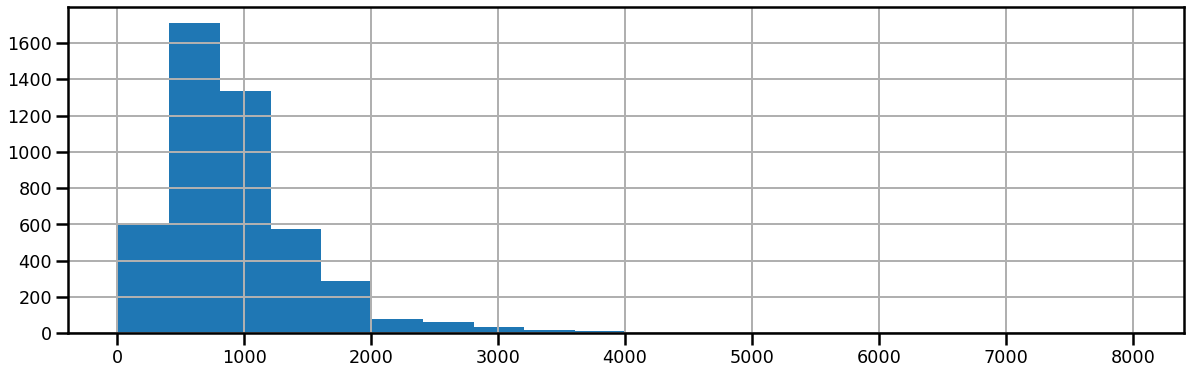

In [32]:
n_bins = 20
plt.figure(figsize = (20, 6))
df["Size"].hist(bins = n_bins);

Size vs Rent Comparison

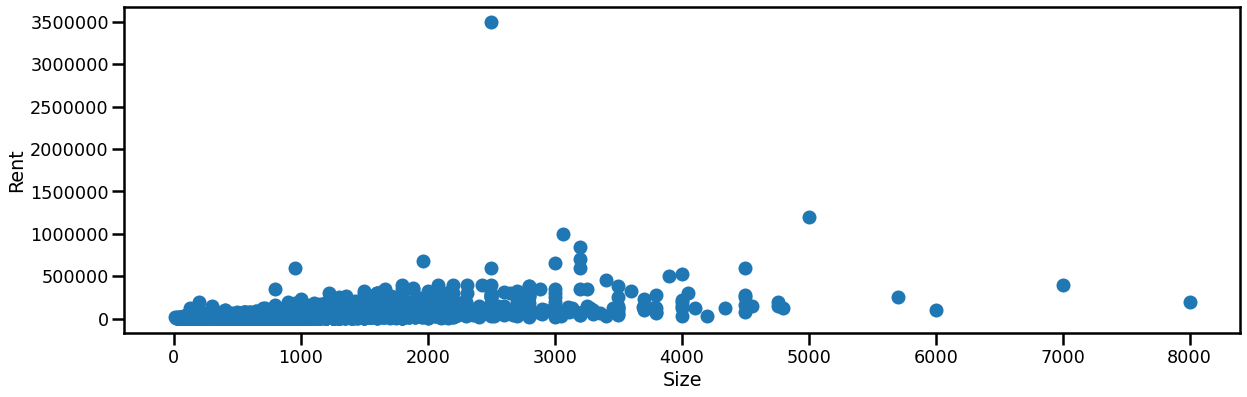

In [33]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
plt.scatter(df["Size"], df["Rent"])
plt.xlabel("Size")
plt.ylabel("Rent");

In [36]:
px.histogram(df, x="Size", color_discrete_sequence=['crimson'],title="Size Distribution")

In [41]:
X = df.drop('Rent',axis= 1)
y = df.Rent

In [42]:
X.head()

,BHK,Size,Floor,Bathroom,Total Floors,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,1100,Ground,2,2,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,800,1,1,3,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,1000,1,1,3,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2,800,1,1,2,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2,850,1,1,2,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [43]:
y.head()

0    10000
1    20000
2    17000
3    10000
4     7500
Name: Rent, dtype: int64